<a href="https://colab.research.google.com/github/eminshall/Predictive-Analytics/blob/main/Billionaire_Data_Science_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Data Wrangling

## 1.1 Objectives

Can I improve my odds of becoming a billionaire?

## Abstract

This was a difficult project where the features impacted model performance wildly and it was difficult to determine which features should be kept or dropped. For example, if I used rate based features against final worth those features created too much multi corrilarity. Similarly, Rank was too closely associated with finalworth. However, if I dropped columns such as name, last name, organization, then the model couldn't predict final worth at all.

Finding a balance was critical, but even then, it was disappointing to conclude modeling different deltas would be an uninteresting point of interest considering the features the model found most useful were names.

This was a good lesson in although the data might be interesting from a vain standpoint. The features really make or break a project's data exploration and modeling value.

### 1.1.1 Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import datetime
import pickle
from sklearn import __version__ as sklearn_version

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2 Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Billionaires Statistics Dataset.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/cbb_cleaned.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [ ]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


## 1.3 Explore Data

### 1.3.1 Feature of Interest

In [ ]:
x = df[['personName']].sample()
x

,personName
555,Tom Golisano


In [ ]:
df[df['personName'] == 'Tom Golisano'].T

,555
finalWorth,4900
category,Service
personName,Tom Golisano
age,81.0
country,United States
city,Naples
source,Payroll services
countryOfCitizenship,United States
selfMade,True
status,D


### 1.3.2 Missing Values by Column

In [ ]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
rank,0,0.000000
finalWorth,0,0.000000
category,0,0.000000
personName,0,0.000000
source,0,0.000000
selfMade,0,0.000000
countryOfCitizenship,0,0.000000
industries,0,0.000000
lastName,0,0.000000
gender,0,0.000000


### 1.3.3 Categorical Features

In [ ]:
df.select_dtypes('object').head()

,category,personName,country,city,source,industries,countryOfCitizenship,organization,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,gdp_country
0,Fashion & Retail,Bernard Arnault & family,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,"$2,715,518,274,227"
1,Automotive,Elon Musk,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,"$21,427,700,000,000"
2,Technology,Jeff Bezos,United States,Medina,Amazon,Technology,United States,Amazon,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,"$21,427,700,000,000"
3,Technology,Larry Ellison,United States,Lanai,Oracle,Technology,United States,Oracle,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,"$21,427,700,000,000"
4,Finance & Investments,Warren Buffett,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,"$21,427,700,000,000"


#### 1.3.3.1 Unique Values

In [ ]:
df['category'].value_counts()

,count
category,
Finance & Investments,372
Manufacturing,324
Technology,314
Fashion & Retail,266
Food & Beverage,212
Healthcare,201
Real Estate,193
Diversified,187
Energy,100


In [ ]:
df['status'].value_counts()

,count
status,
D,1223
U,855
E,268
N,150
Split Family Fortune,79
R,65


#### 1.3.3.2 Distinct Values

In [ ]:
df[['category','industries','city','state','country','countryOfCitizenship','residenceStateRegion','organization','title','source','status']].nunique()

,0
category,18
industries,18
city,741
state,45
country,78
countryOfCitizenship,77
residenceStateRegion,5
organization,294
title,97
source,906


In [ ]:
df[['category','industries']]

,category,industries
0,Fashion & Retail,Fashion & Retail
1,Automotive,Automotive
2,Technology,Technology
3,Technology,Technology
4,Finance & Investments,Finance & Investments
...,...,...
2635,Healthcare,Healthcare
2636,Food & Beverage,Food & Beverage
2637,Manufacturing,Manufacturing
2638,Real Estate,Real Estate


#### 1.3.3.3 Distribution of Values

Text(0.5, 0, 'Count')

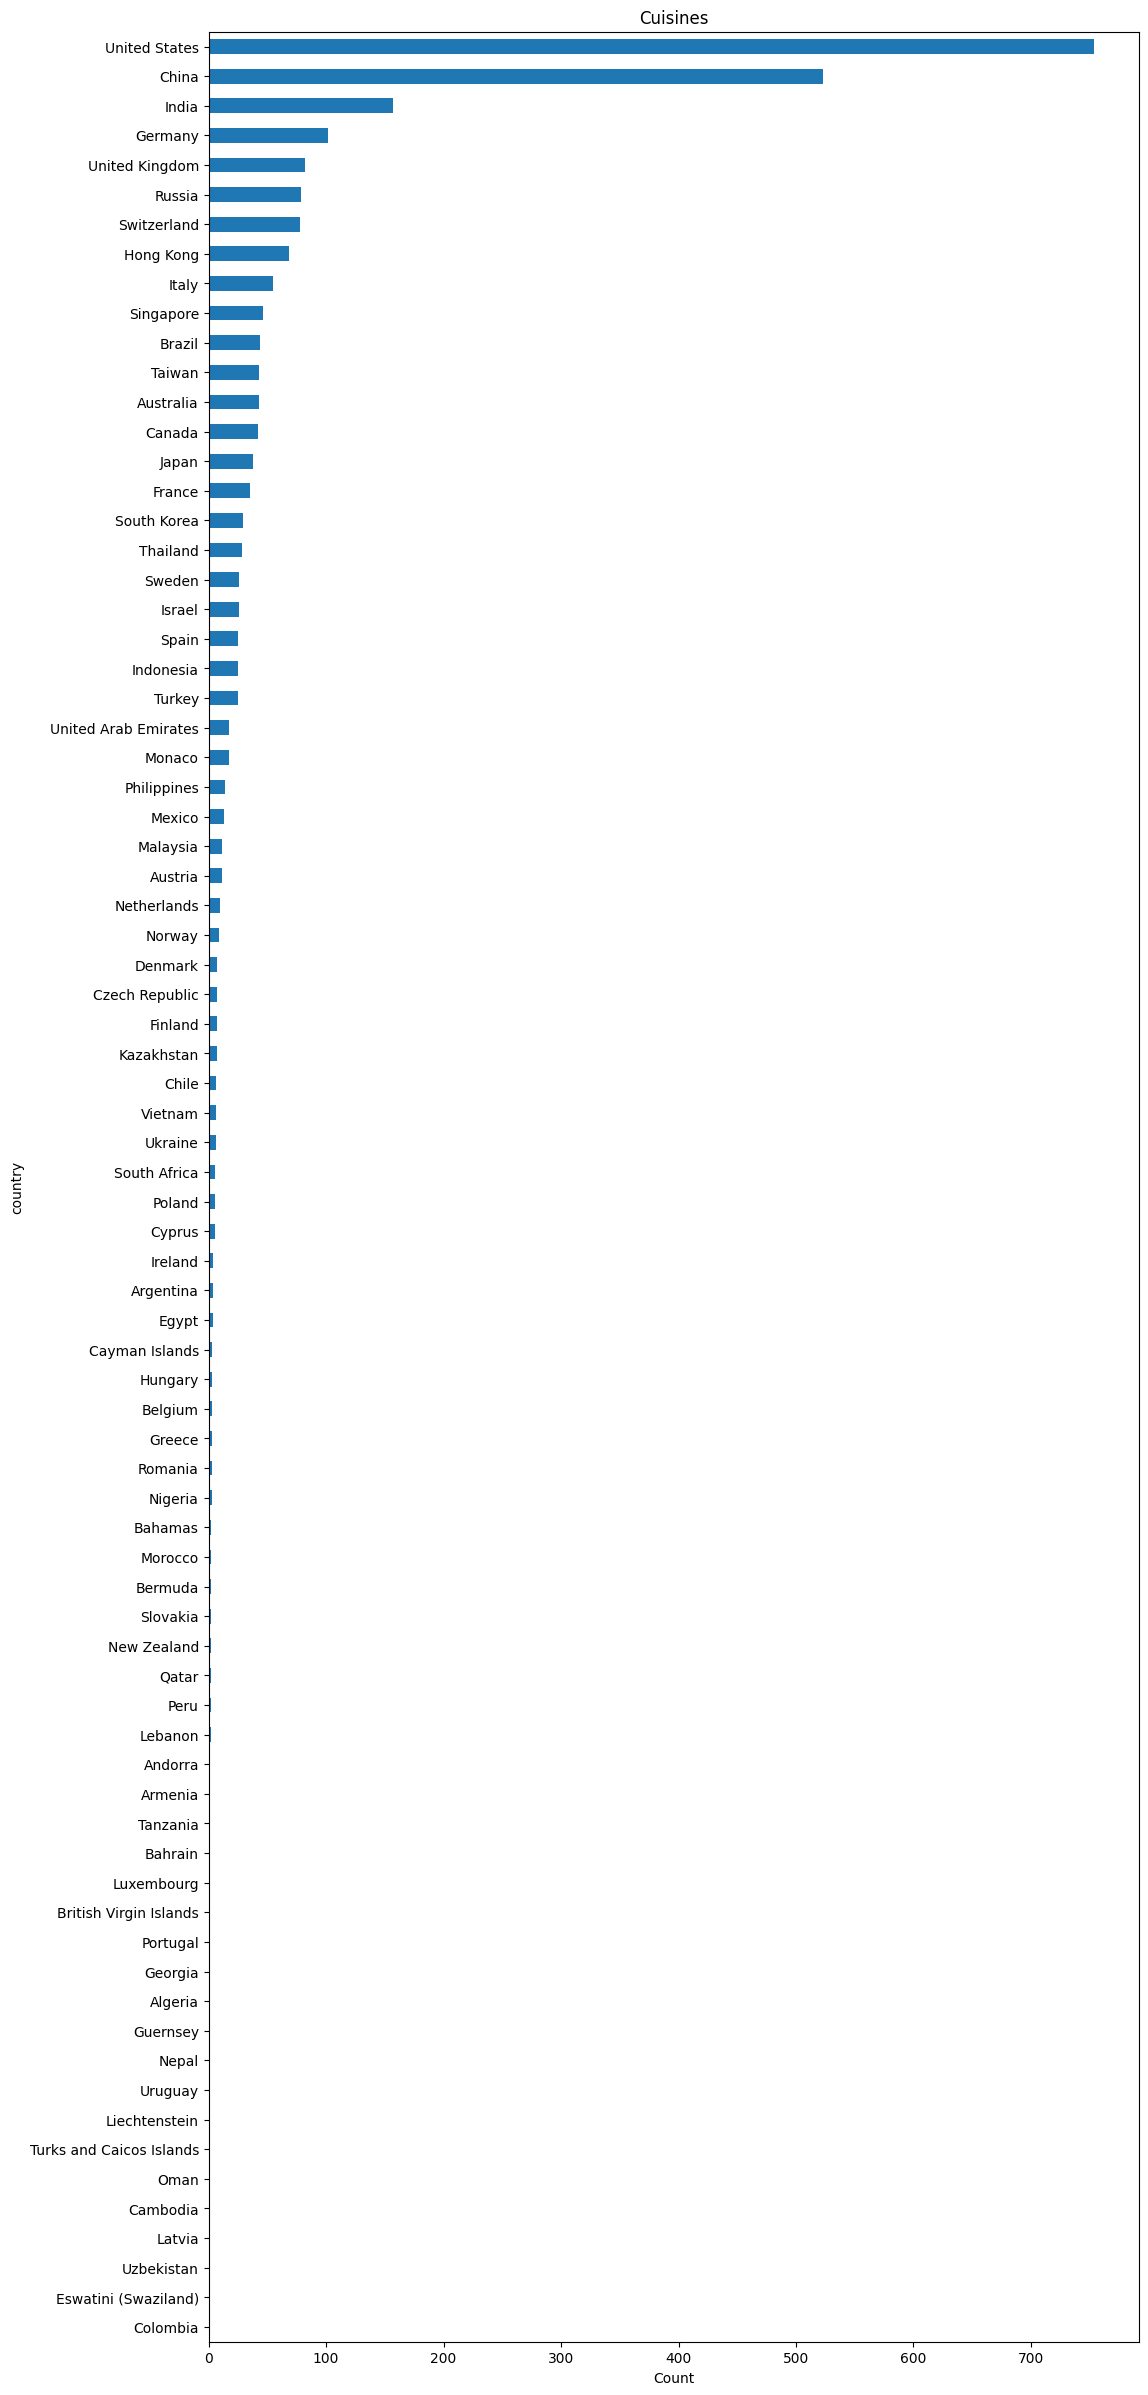

In [ ]:
df['country'].value_counts().sort_values().plot(kind='barh', figsize=(12, 30), title='Cuisines')
plt.xlabel('Count')

#### 1.3.3.4 Distribution of Values to Target Variable

##### 1.3.3.4.1 Average Price to Category Feature

In [ ]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [ ]:
def target_means_plot(cat,value):
    target_means = df.groupby(cat)[[value]].mean()

    target_means_sorted = target_means.reindex(index=target_means.mean(axis=1).sort_values(ascending=False).index)

    target_means_sorted[:20].plot(kind='barh', figsize=(10, 10))
    plt.xlabel('Average final Worth');
    plt.title(f'Average {value} by {cat}');
    plt.show()

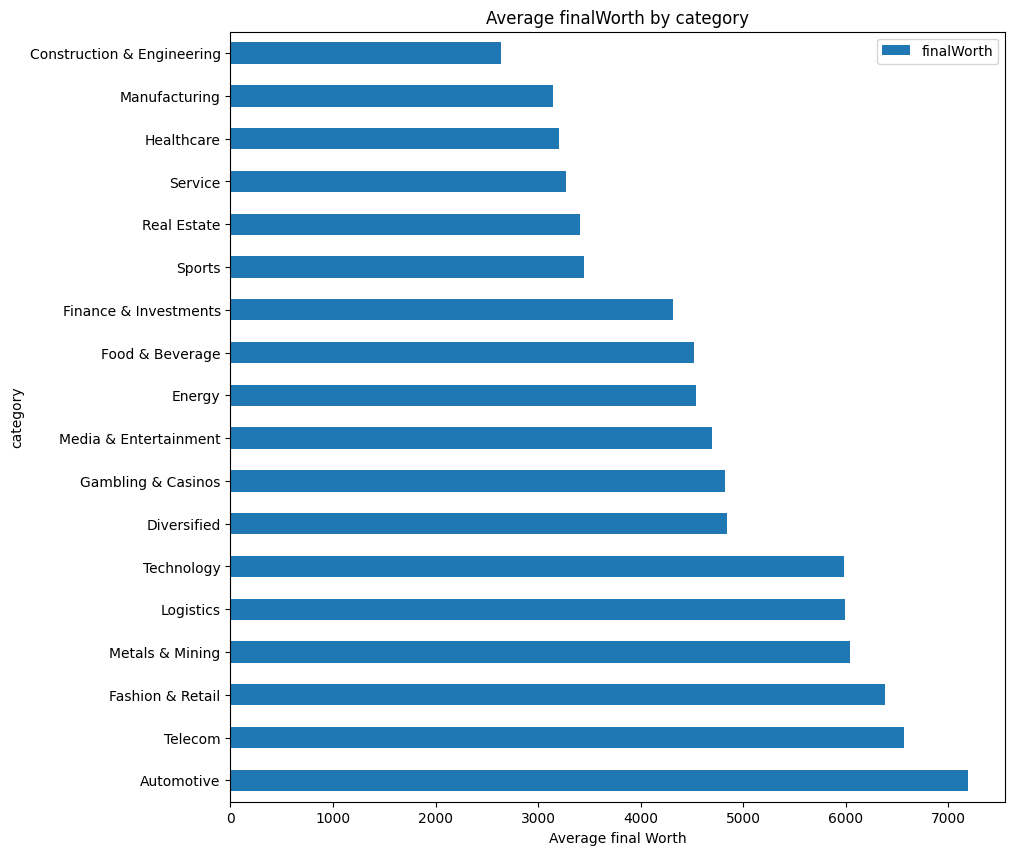

In [ ]:
target_means_plot('category','finalWorth')

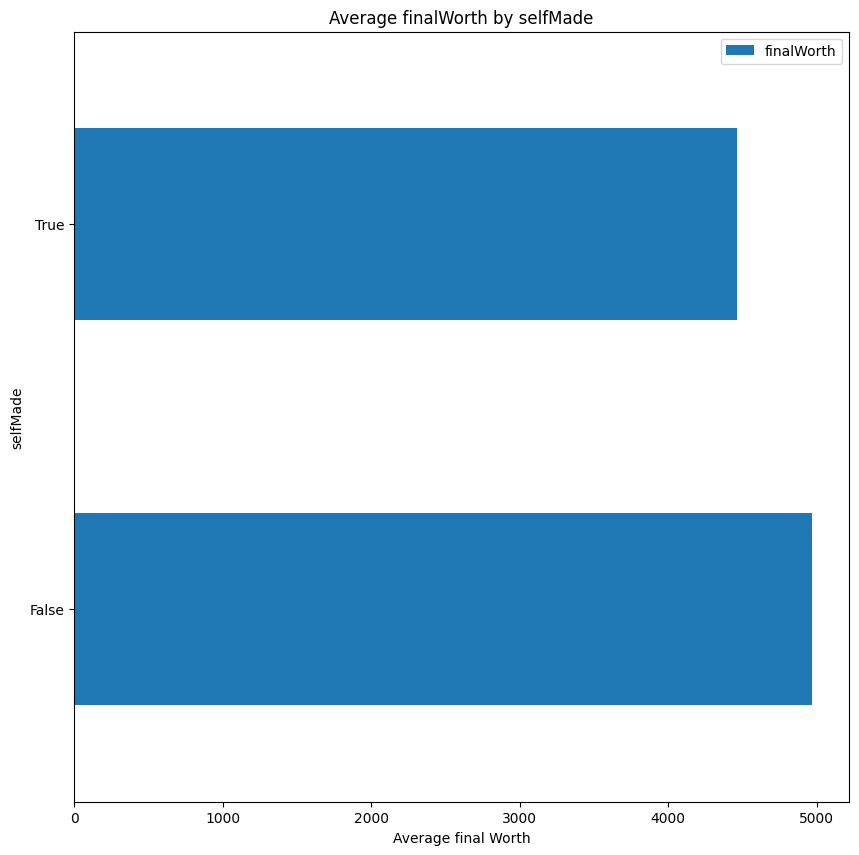

In [ ]:
target_means_plot('selfMade','finalWorth')

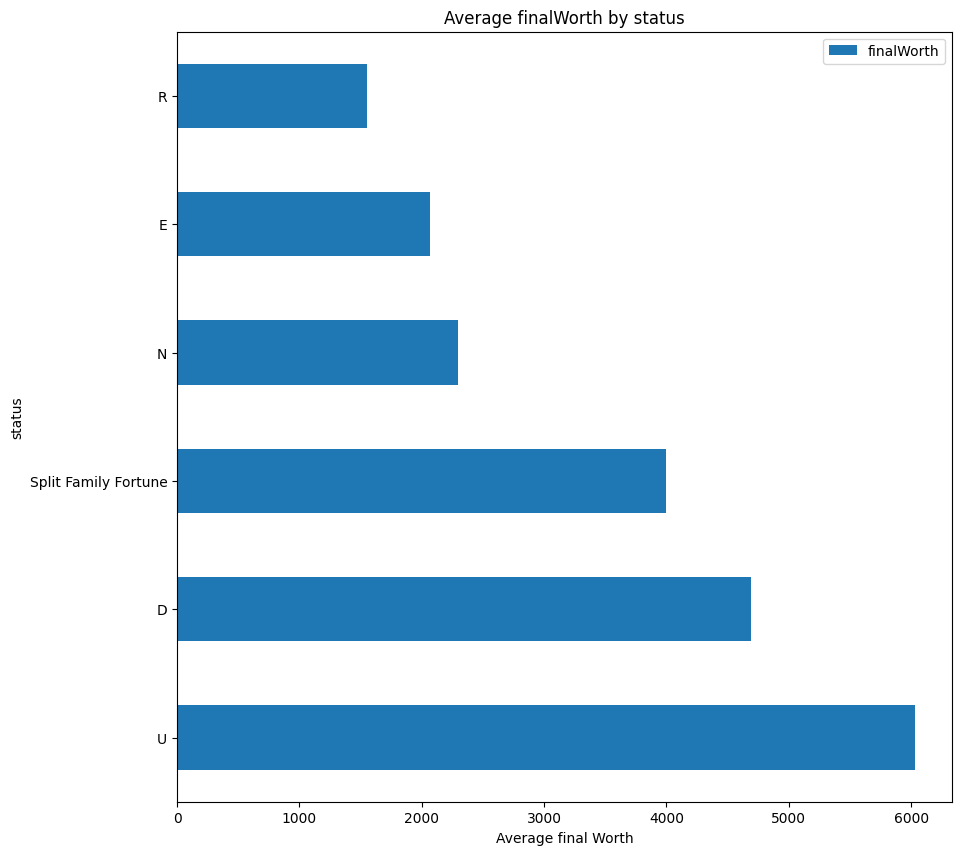

In [ ]:
target_means_plot('status','finalWorth')

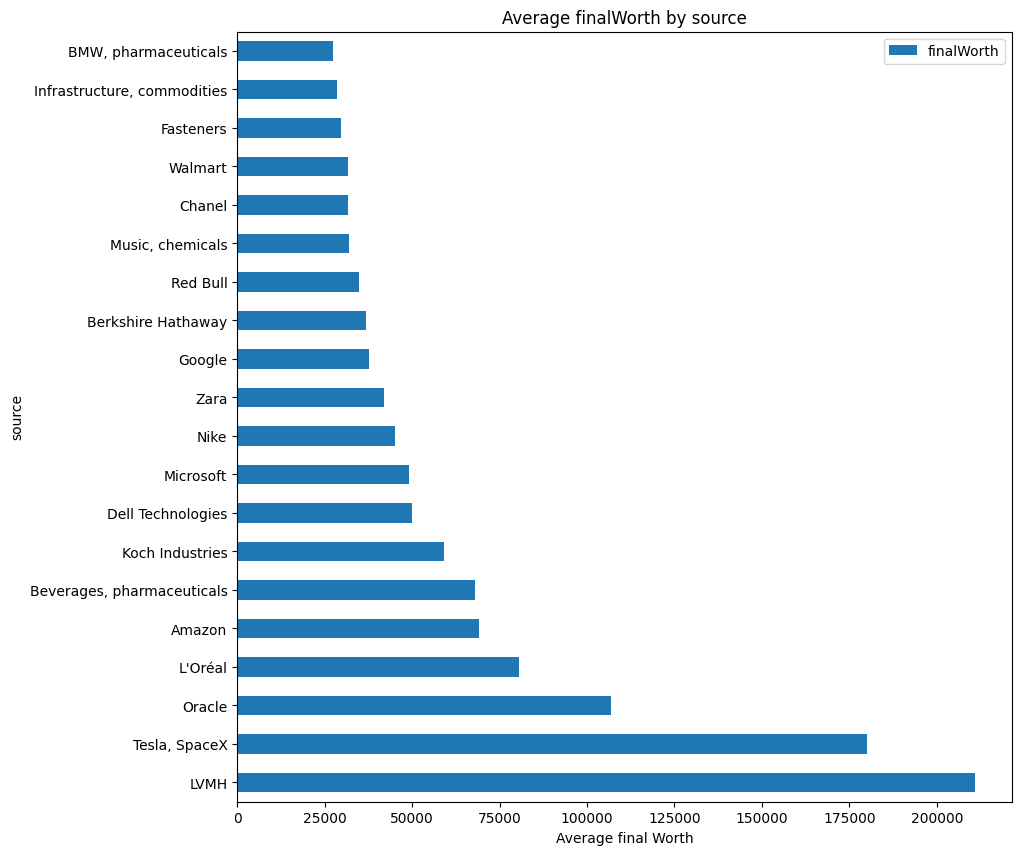

In [ ]:
target_means_plot('source','finalWorth')

##### 1.3.3.4.2 Distribution of Price by Category Feature

### 1.3.4 Numeric Features

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,2640.0,1.289159e+03,7.396937e+02,1.000000,6.590000e+02,1.312000e+03,1.905000e+03,2.540000e+03
finalWorth,2640.0,4.623788e+03,9.834241e+03,1000.000000,1.500000e+03,2.300000e+03,4.200000e+03,2.110000e+05
age,2575.0,6.514019e+01,1.325810e+01,18.000000,5.600000e+01,6.500000e+01,7.500000e+01,1.010000e+02
birthYear,2564.0,1.957183e+03,1.328252e+01,1921.000000,1.948000e+03,1.957000e+03,1.966000e+03,2.004000e+03
birthMonth,2564.0,5.740250e+00,3.710085e+00,1.000000,2.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
birthDay,2564.0,1.209984e+01,9.918876e+00,1.000000,1.000000e+00,1.100000e+01,2.100000e+01,3.100000e+01
cpi_country,2456.0,1.277552e+02,2.645295e+01,99.550000,1.172400e+02,1.172400e+02,1.250800e+02,2.885700e+02
cpi_change_country,2456.0,4.364169e+00,3.623763e+00,-1.900000,1.700000e+00,2.900000e+00,7.500000e+00,5.350000e+01
gross_tertiary_education_enrollment,2458.0,6.722567e+01,2.134343e+01,4.000000,5.060000e+01,6.560000e+01,8.820000e+01,1.366000e+02
gross_primary_education_enrollment_country,2459.0,1.028585e+02,4.710977e+00,84.700000,1.002000e+02,1.018000e+02,1.026000e+02,1.421000e+02


### 1.3.4.1 Distribution of Feature Values

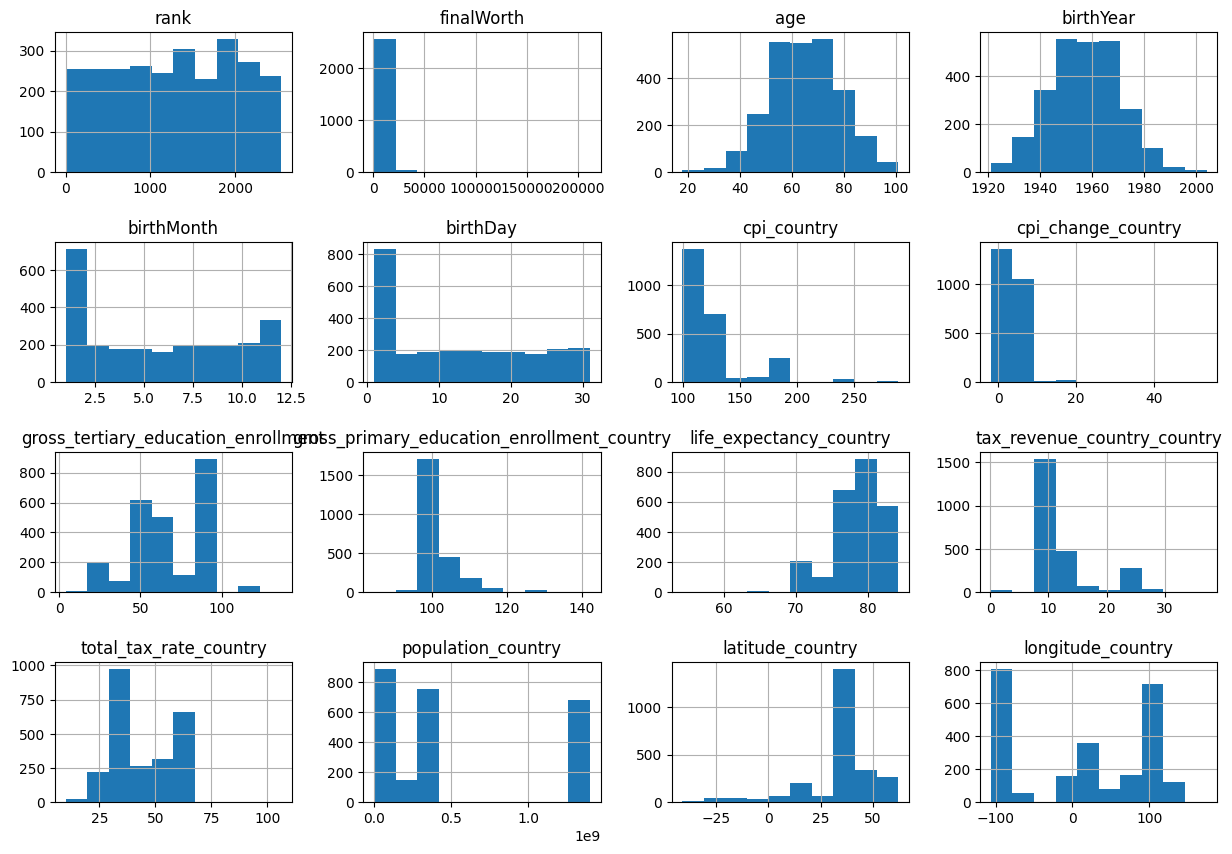

In [ ]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

## 1.4 Drop Rows Missing Target Feature

In [ ]:
missing_price = df[['W']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

In [ ]:
df[['W']].isnull().sum()

In [ ]:
df = df[missing_price != ]

## 1.6 Exogeneous Data & Feature Engineering

### Feature Engineering

In [ ]:
df['gender'] = pd.factorize(df['gender'])[0]
df['firstName'] = pd.factorize(df['firstName'])[0]
df['lastName'] = pd.factorize(df['lastName'])[0]
df['title'] = pd.factorize(df['title'])[0]
df['city_encoded'] = pd.factorize(df['city'])[0]
df['country_encoded'] = pd.factorize(df['country'])[0]
df['countryOfCitizenship_encoded'] = pd.factorize(df['countryOfCitizenship'])[0]
df['residenceStateRegion_encoded'] = pd.factorize(df['residenceStateRegion'])[0]
df['category_encoded'] = pd.factorize(df['category'])[0]
df['status_encoded'] = pd.factorize(df['status'])[0]

In [ ]:
df['organization'].value_counts()

,count
organization,
Meta Platforms,4
Gap Inc.,3
Alphabet,2
Tanium,2
Datadog,2
...,...
Baupost Group,1
Sawdust Investment Management Corp.,1
"Koch Industries, Inc.",1


In [ ]:
url = ''
df2 = pd.read_html(url)

In [ ]:
type(df2)

In [ ]:
len(df2)

In [ ]:
df2 = df2[0]
df2.head()

## 1.5 Review Distributions

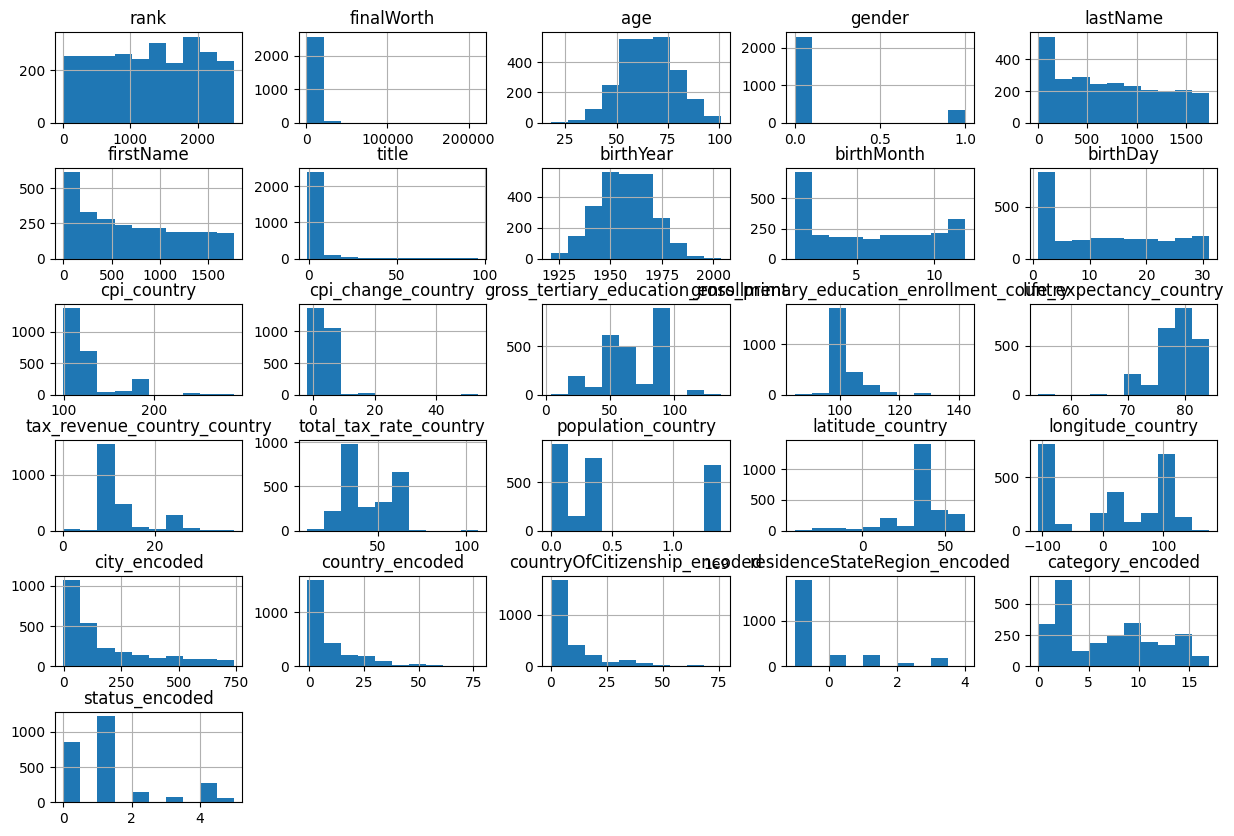

In [ ]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## 1.7 Target Feature

In [ ]:
df.plot(x='Target1', y='Target2', kind='scatter');

In [ ]:
df.loc[df[''] == '', ['Target1', 'Target2']]

In [ ]:
df[['', '']].isnull().sum()

In [ ]:
df.shape

(2640, 42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

### 1.7.1 Number of Missing Values by Row

In [ ]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
rank,0,0.000000
finalWorth,0,0.000000
category,0,0.000000
personName,0,0.000000
source,0,0.000000
selfMade,0,0.000000
countryOfCitizenship,0,0.000000
industries,0,0.000000
lastName,0,0.000000
gender,0,0.000000


I'm dropping rank because it correlates too much to final worth and the others either overlap greatly with other columns.

In [ ]:
df.drop(columns=['rank','state', 'residenceStateRegion', 'title', 'organization', 'industries'], inplace=True)

In [ ]:
df.shape

(2640, 36)

In [ ]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
finalWorth,0,0.000000
category,0,0.000000
personName,0,0.000000
countryOfCitizenship,0,0.000000
source,0,0.000000
gender,0,0.000000
status,0,0.000000
selfMade,0,0.000000
date,0,0.000000
lastName,0,0.000000


## 1.8 Save Data

In [ ]:
import os
import pickle

def save_file(data, filename, datapath):
    """Saves data to a file in the specified directory, supporting CSV and pickle formats."""
    if not os.path.exists(datapath):
        os.makedirs(datapath)
    file_path = os.path.join(datapath, filename)

    if filename.endswith('.csv'):
        data.to_csv(file_path, index=False)
        print(f"DataFrame saved to {file_path}")
    elif filename.endswith('.pkl'):
        with open(file_path, 'wb') as f:
            pickle.dump(data, f)
        print(f"Model saved to {file_path}")
    else:
        print(f"Unsupported file format for {filename}")

In [ ]:
datapath = '/content/drive/MyDrive/Data'

save_file(df, 'billionaire_cleaned.csv', datapath)

DataFrame saved to /content/drive/MyDrive/Data/billionaire_cleaned.csv


In [ ]:
datapath = '../data'
save_file(df2, 'df2.csv', datapath)

# 2.0 Exploratory Data Analysis

In [ ]:
df.columns

Index(['finalWorth', 'category', 'personName', 'age', 'country', 'city',
       'source', 'countryOfCitizenship', 'selfMade', 'status', 'gender',
       'birthDate', 'lastName', 'firstName', 'date', 'birthYear', 'birthMonth',
       'birthDay', 'cpi_country', 'cpi_change_country', 'gdp_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'city_encoded', 'country_encoded', 'countryOfCitizenship_encoded',
       'residenceStateRegion_encoded', 'category_encoded', 'status_encoded',
       'fisrtName'],
      dtype='object')

## Univariate Analysis

In [ ]:
def plot_compare(feat_name, description, name, bins=30, conf=None, figsize=(10, 5)):
    """Graphically compare distributions of features.

    Plot histogram of values for all resorts and reference line to mark
    Boise State's position.

    Arguments:
    feat_name - the feature column name in the data
    description - text description of the feature
    conf - select a specific conference (None for all conferences)
    figsize - (optional) figure size
    """
    boise_st = df[df['personName'] == name]

    plt.subplots(figsize=figsize)
    # quirk that hist sometimes objects to NaNs, sometimes doesn't
    # filtering only for finite values tidies this up
    if conf is None:
        ski_x = df[feat_name]
    else:
        ski_x = df.loc[df.category == conf, feat_name]
    ski_x = ski_x[np.isfinite(ski_x)]
    plt.hist(ski_x, bins)
    # Calculate the mean value for Boise State to plot a single vertical line
    boise_st_mean_feat = boise_st[feat_name].mean()
    plt.axvline(x=boise_st_mean_feat, c='r', ls='--', alpha=0.8, label=name)
    plt.xlabel(description)
    plt.ylabel('frequency')
    plt.title(description + ' distribution for teams')
    plt.legend()

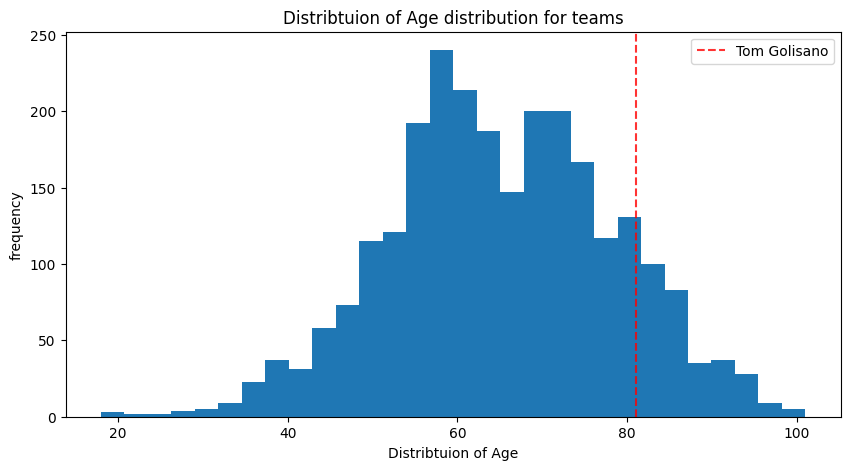

In [ ]:
plot_compare('age', 'Distribtuion of Age', name='Tom Golisano')

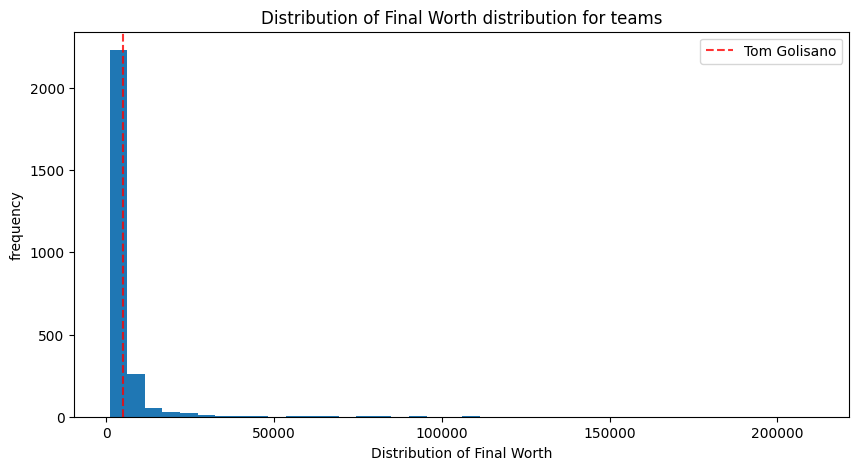

In [ ]:
plot_compare('finalWorth', 'Distribution of Final Worth',bins=40, name='Tom Golisano')

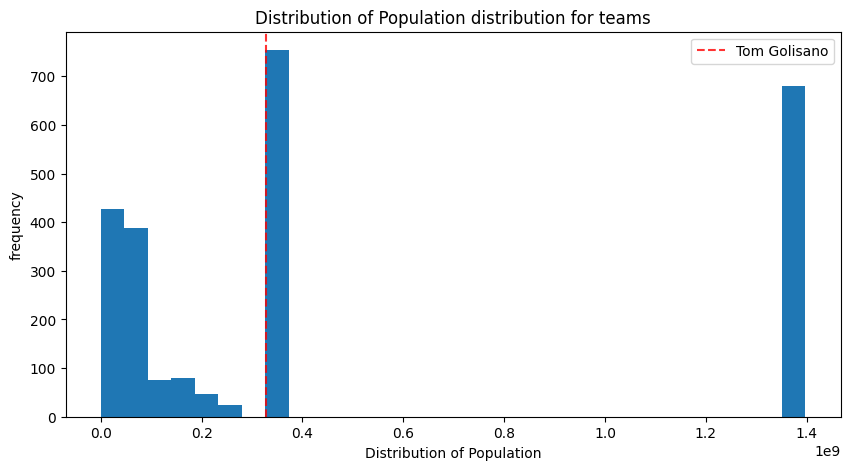

In [ ]:
plot_compare('population_country', 'Distribution of Population', name='Tom Golisano')

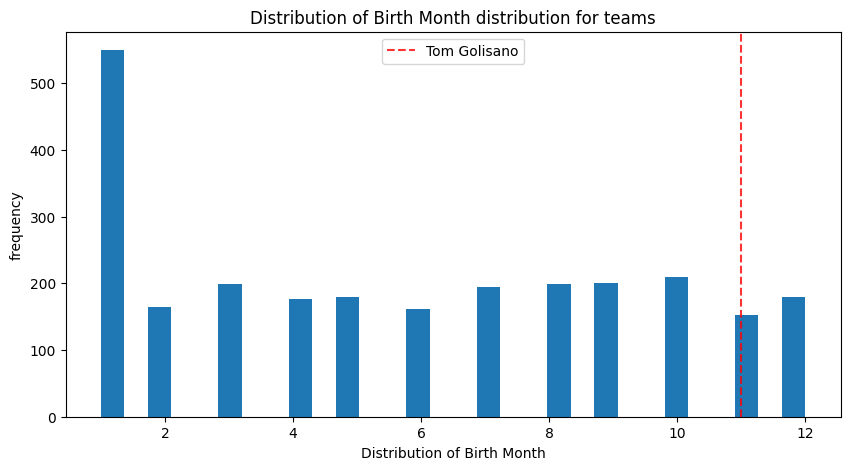

In [ ]:
plot_compare('birthMonth', 'Distribution of Birth Month', name='Tom Golisano')

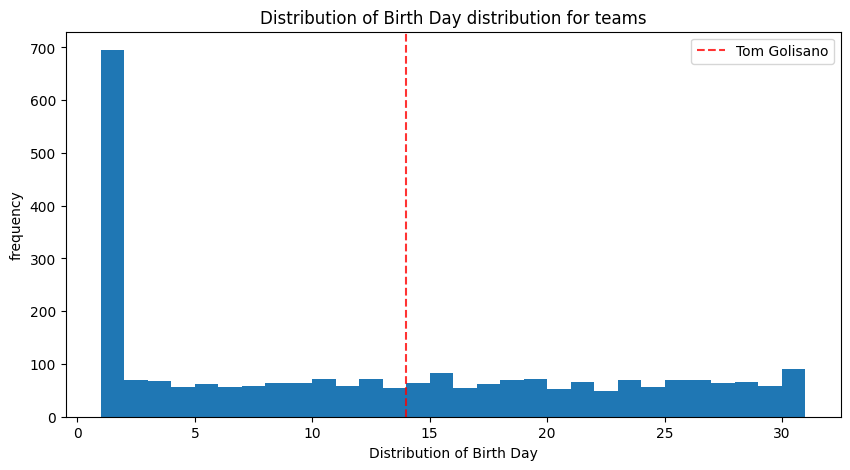

In [ ]:
plot_compare('birthDay', 'Distribution of Birth Day', name='Tom Golisano')

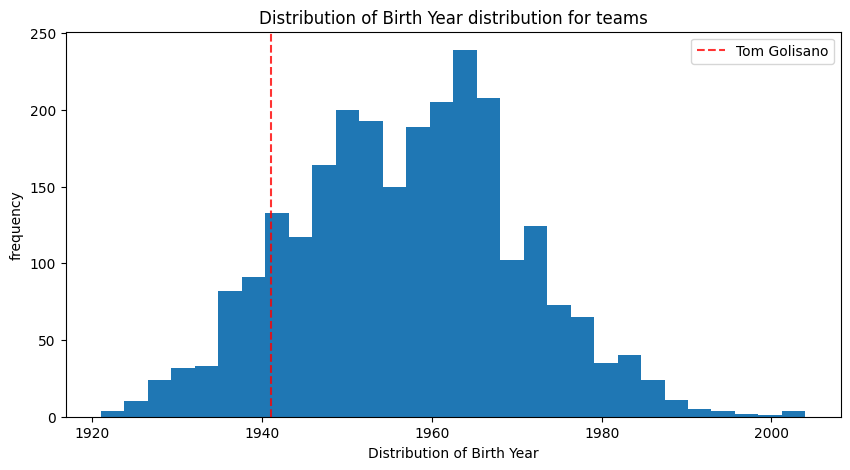

In [ ]:
plot_compare('birthYear', 'Distribution of Birth Year', name='Tom Golisano')

In [ ]:
df['city'].value_counts().head()

,count
city,
New York,99
Beijing,68
Hong Kong,68
Shanghai,64
London,61


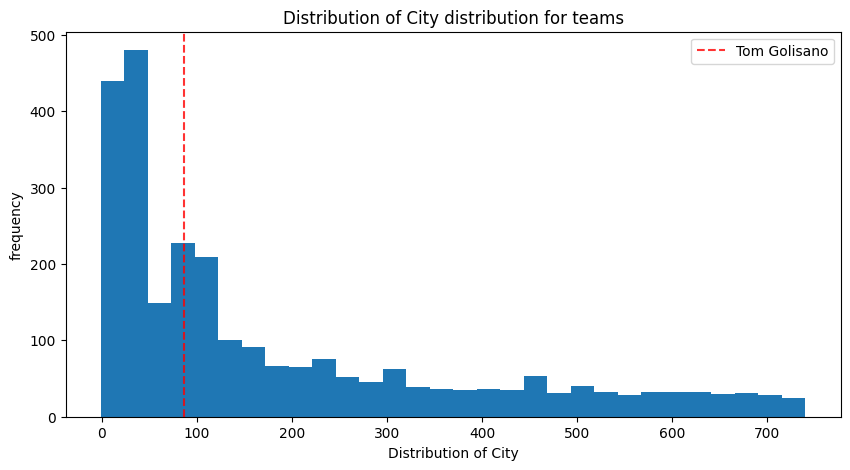

In [ ]:
plot_compare('city_encoded', 'Distribution of City', name='Tom Golisano')

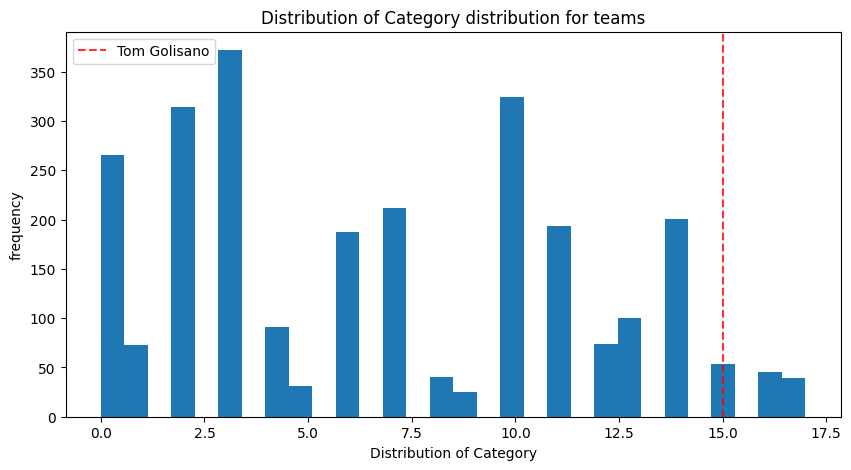

In [ ]:
plot_compare('', 'Distribution of Category', name='Tom Golisano')

## Bi-variate Analysis

In [ ]:
def plot_scatter_by_filters(df, x_col, y_col, conf=None, year=None, xlabel=None, ylabel=None, title=None):
    """
    Generates a scatter plot of two numeric columns, with optional filtering by conference and year.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The name of the column for the x-axis.
        y_col (str): The name of the column for the y-axis.
        conf (str, optional): The conference to filter by. Defaults to None (plot all conferences).
        year (int, optional): The year to filter by. Defaults to None (plot all years).
        xlabel (str, optional): The label for the x-axis. Defaults to the x_col name.
        ylabel (str, optional): The label for the y-axis. Defaults to the y_col name.
        title (str, optional): The title of the plot. Defaults to a generated title.
    """
    df_filtered = df.copy()

    if conf:
        df_filtered = df_filtered[df_filtered['CONF'] == conf]
        if df_filtered.empty:
            print(f"No data found for conference: {conf}")
            return

    if year:
        df_filtered = df_filtered[df_filtered['YEAR'] == year]
        if df_filtered.empty:
            print(f"No data found for year: {year}")
            return

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_filtered, x=x_col, y=y_col)

    if xlabel is None:
        xlabel = x_col
    if ylabel is None:
        ylabel = y_col
    if title is None:
        title = f'{y_col} vs {x_col}'
        if conf and year:
            title += f' for {conf} Conference in {year}'
        elif conf:
            title += f' for {conf} Conference'
        elif year:
            title += f' in {year}'

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

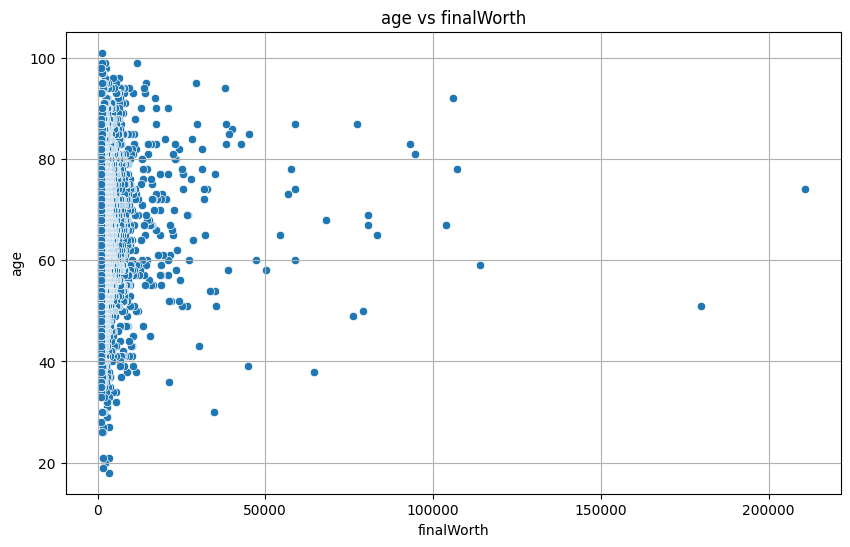

In [ ]:
plot_scatter_by_filters(df, 'finalWorth', 'age')

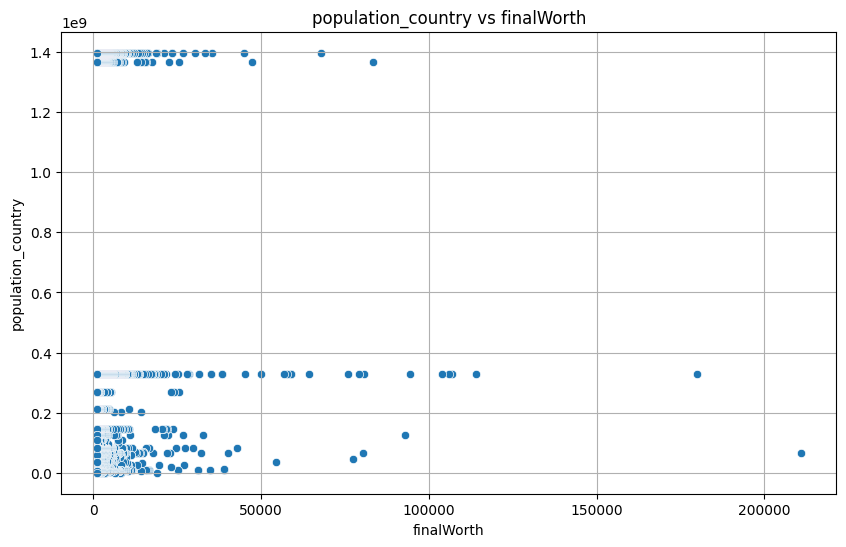

In [ ]:
plot_scatter_by_filters(df, 'finalWorth', 'population_country')

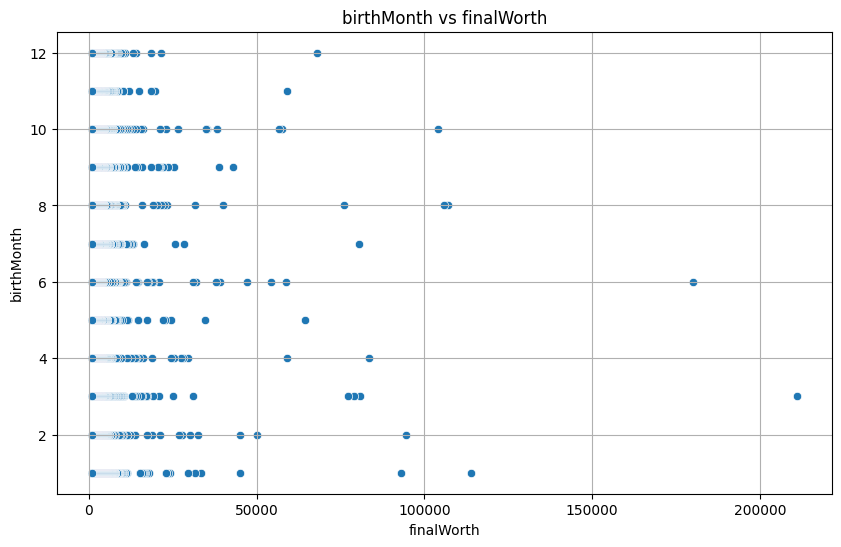

In [ ]:
plot_scatter_by_filters(df, 'finalWorth', 'birthMonth')

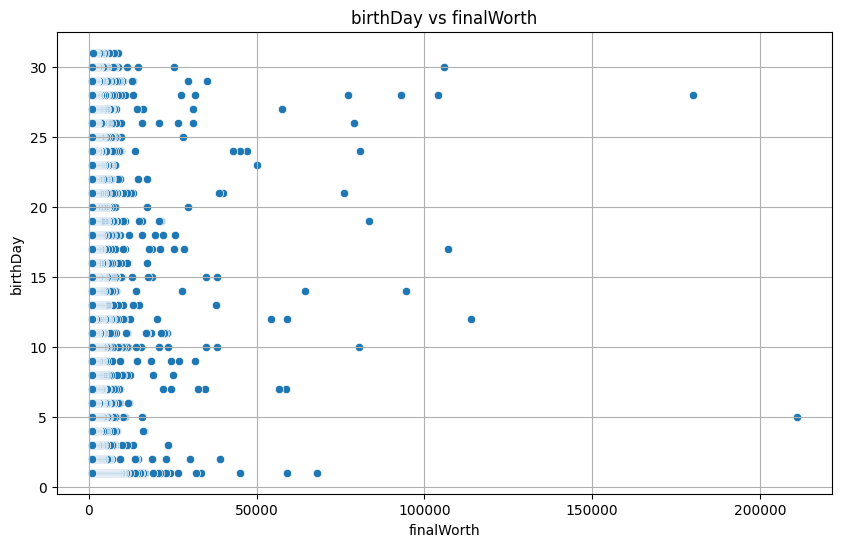

In [ ]:
plot_scatter_by_filters(df, 'finalWorth', 'birthDay')

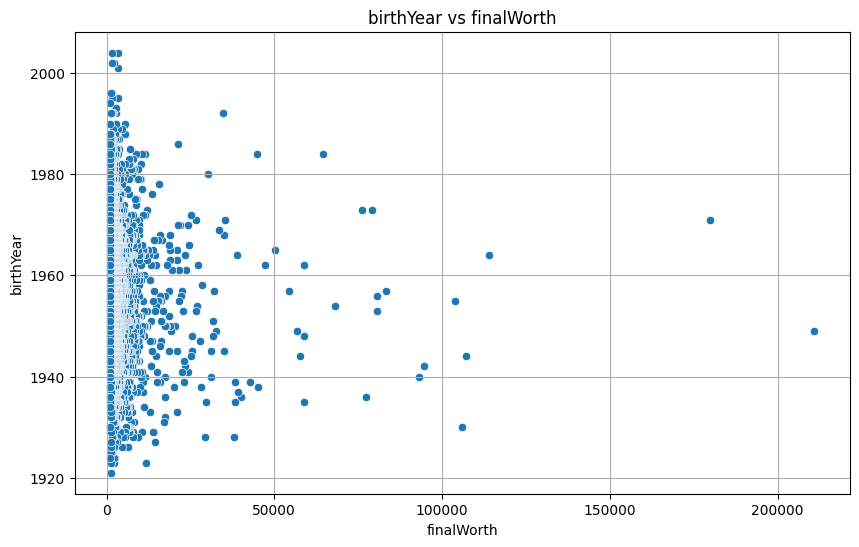

In [ ]:
plot_scatter_by_filters(df, 'finalWorth', 'birthYear')

## Time Series Analysis

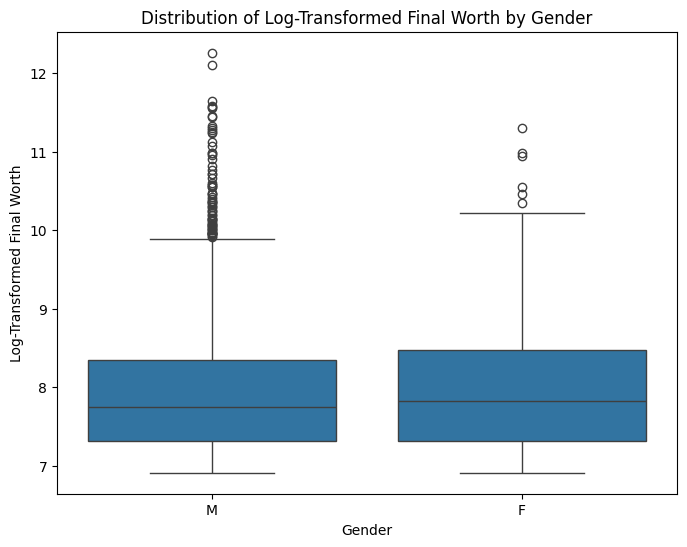

In [ ]:
# Apply logarithmic transformation to 'finalWorth'
# Add a small constant to avoid log(0) if there are any zero values, although finalWorth starts at 1000
df['finalWorth_log'] = np.log1p(df['finalWorth'])

# Plot the boxplot with the transformed 'finalWorth_log'
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='finalWorth_log', data=df)
plt.title('Distribution of Log-Transformed Final Worth by Gender')
plt.xlabel('Gender')
plt.ylabel('Log-Transformed Final Worth')
plt.show()

In [ ]:
def plot_team_performance_over_years(df, y_col, conf=None, ylabel=None, highlight_team=None):
    """
    Generates a line plot showing a numeric performance metric over the years for each team,
    optionally filtered by conference, and highlights a specific team.

    Args:
        df (pd.DataFrame): The input DataFrame with 'TEAM', 'YEAR', and the specified y_col.
        y_col (str): The name of the numeric column to plot on the y-axis.
        conf (str, optional): The conference to filter by. Defaults to None (plot all teams).
        ylabel (str, optional): The label for the y-axis. Defaults to the y_col name.
        highlight_team (str, optional): The name of the team to highlight. Defaults to None.
    """
    plt.figure(figsize=(15, 8))

    if conf:
        df_filtered = df[df['CONF'] == conf].copy()
        if df_filtered.empty:
            print(f"No teams found for conference: {conf}")
            return
        teams = df_filtered['TEAM'].unique()
        plt.title(f'{y_col} Over Years for Teams in {conf} Conference')
    else:
        df_filtered = df.copy()
        teams = df_filtered['TEAM'].unique()
        plt.title(f'{y_col} Over Years for Each Team')

    if ylabel is None:
        ylabel = y_col

    for team in teams:
        team_data = df_filtered[df_filtered['TEAM'] == team].sort_values(by='YEAR')
        if team == highlight_team:
            plt.plot(team_data['YEAR'], team_data[y_col], marker='o', linestyle='-', label=team, color='red', linewidth=2)
        else:
            plt.plot(team_data['YEAR'], team_data[y_col], marker='o', linestyle='-', label=team if len(teams) < 20 else "_nolegend_", alpha=0.5) # Add label for legend if not too many teams


    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.grid(True)

    # Add legend only if there are not too many teams or a team is highlighted
    if len(teams) < 20 or highlight_team:
        plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

## Multi-Variate Analysis

In [ ]:
columns = df.select_dtypes(['int64','float64']).columns.to_list()
team_avg_win = df.groupby('category')[columns].mean()
team_avg_win.head()


,finalWorth,age,gender,lastName,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,...,population_country,latitude_country,longitude_country,city_encoded,country_encoded,countryOfCitizenship_encoded,residenceStateRegion_encoded,category_encoded,status_encoded,fisrtName
category,,,,,,,,,,,,,,,,,,,,,
Automotive,7195.890411,66.138889,0.095890,705.328767,1955.871429,5.942857,12.142857,130.118714,3.927143,58.347143,...,7.671360e+08,34.602856,43.950196,175.164384,7.863014,8.452055,-0.712329,1.0,0.986301,782.547945
Construction & Engineering,2633.333333,64.590909,0.133333,875.133333,1957.840909,5.431818,13.977273,136.303333,3.535714,62.969048,...,3.166658e+08,40.084913,21.162376,165.888889,11.511111,11.755556,-0.777778,16.0,1.155556,840.444444
Diversified,4840.641711,68.703297,0.155080,822.235294,1953.664835,5.697802,11.208791,147.823631,4.644693,53.657542,...,3.763556e+08,28.985089,41.482603,190.791444,21.074866,21.304813,-0.850267,6.0,1.224599,736.192513
Energy,4535.000000,67.824742,0.100000,691.160000,1954.525773,5.824742,11.082474,135.440208,5.386458,72.265625,...,4.324446e+08,36.135674,10.709738,165.890000,10.910000,10.550000,-0.560000,13.0,0.990000,641.120000
Fashion & Retail,6386.466165,66.783784,0.146617,667.466165,1955.617761,5.359073,12.162162,122.291240,3.507200,69.136000,...,3.778800e+08,37.507979,8.876164,196.033835,11.560150,9.954887,-0.432331,0.0,1.180451,646.917293


In [ ]:
team_avg_win_index = team_avg_win.index

team_avg_win_columns = team_avg_win.columns
team_avg_win_scale = team_avg_win.copy()

team_avg_win_scale = scale(team_avg_win_scale)

team_avg_win_scale = pd.DataFrame(team_avg_win_scale, columns=team_avg_win_columns, index=team_avg_win_index)
team_avg_win_scale.std(ddof=0)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


,0
finalWorth,1.0
age,1.0
gender,1.0
lastName,1.0
birthYear,1.0
birthMonth,1.0
birthDay,1.0
cpi_country,1.0
cpi_change_country,1.0
gross_tertiary_education_enrollment,1.0


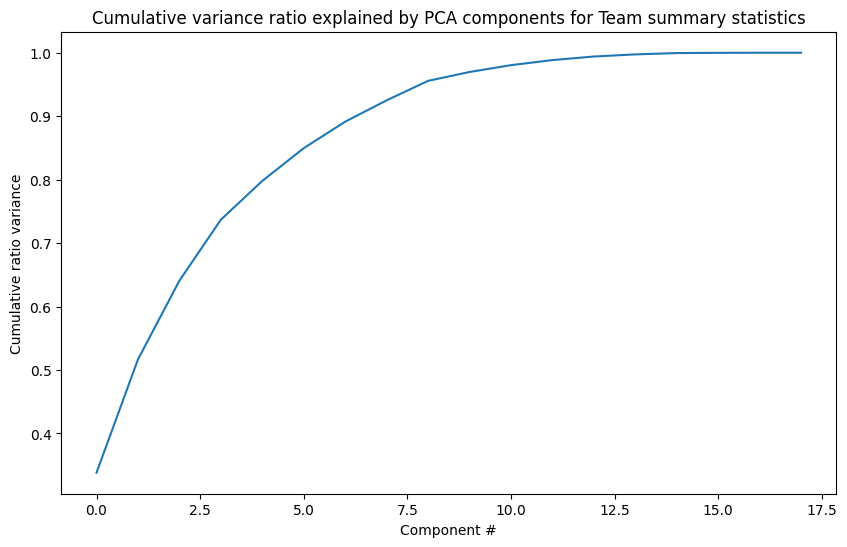

In [ ]:
team_pca = PCA().fit(team_avg_win_scale)

plt.subplots(figsize=(10, 6))
plt.plot(team_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Team summary statistics');

In [ ]:
team_pca_x = team_pca.transform(team_avg_win_scale)
team_pca_x.shape

(18, 18)

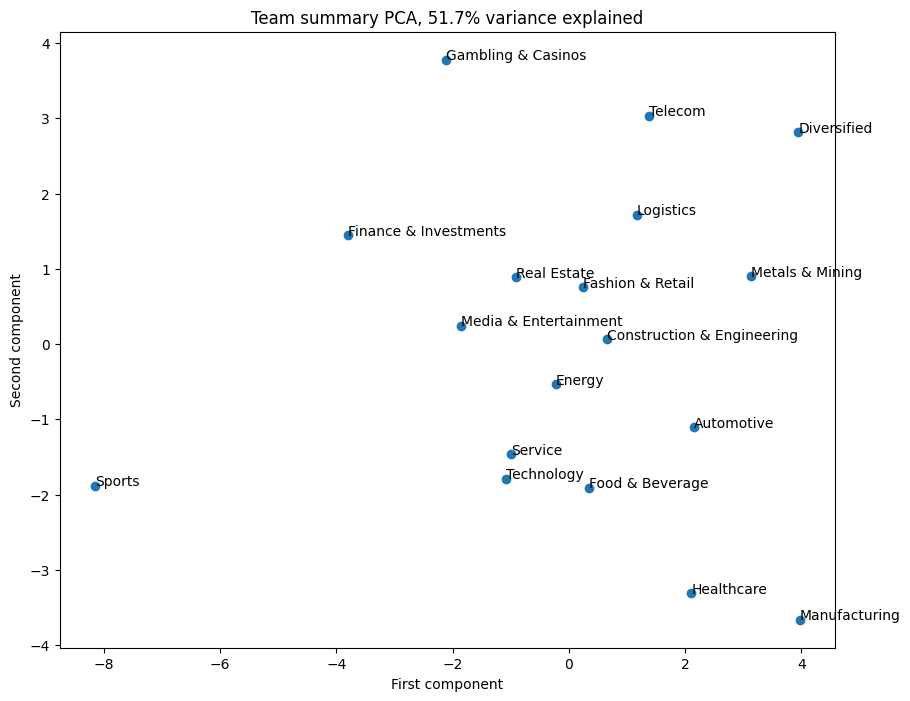

In [ ]:
x = team_pca_x[:, 0]
y = team_pca_x[:, 1]
state = team_avg_win_index
pc_var = 100 * team_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Team summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))


### Feature Correlation

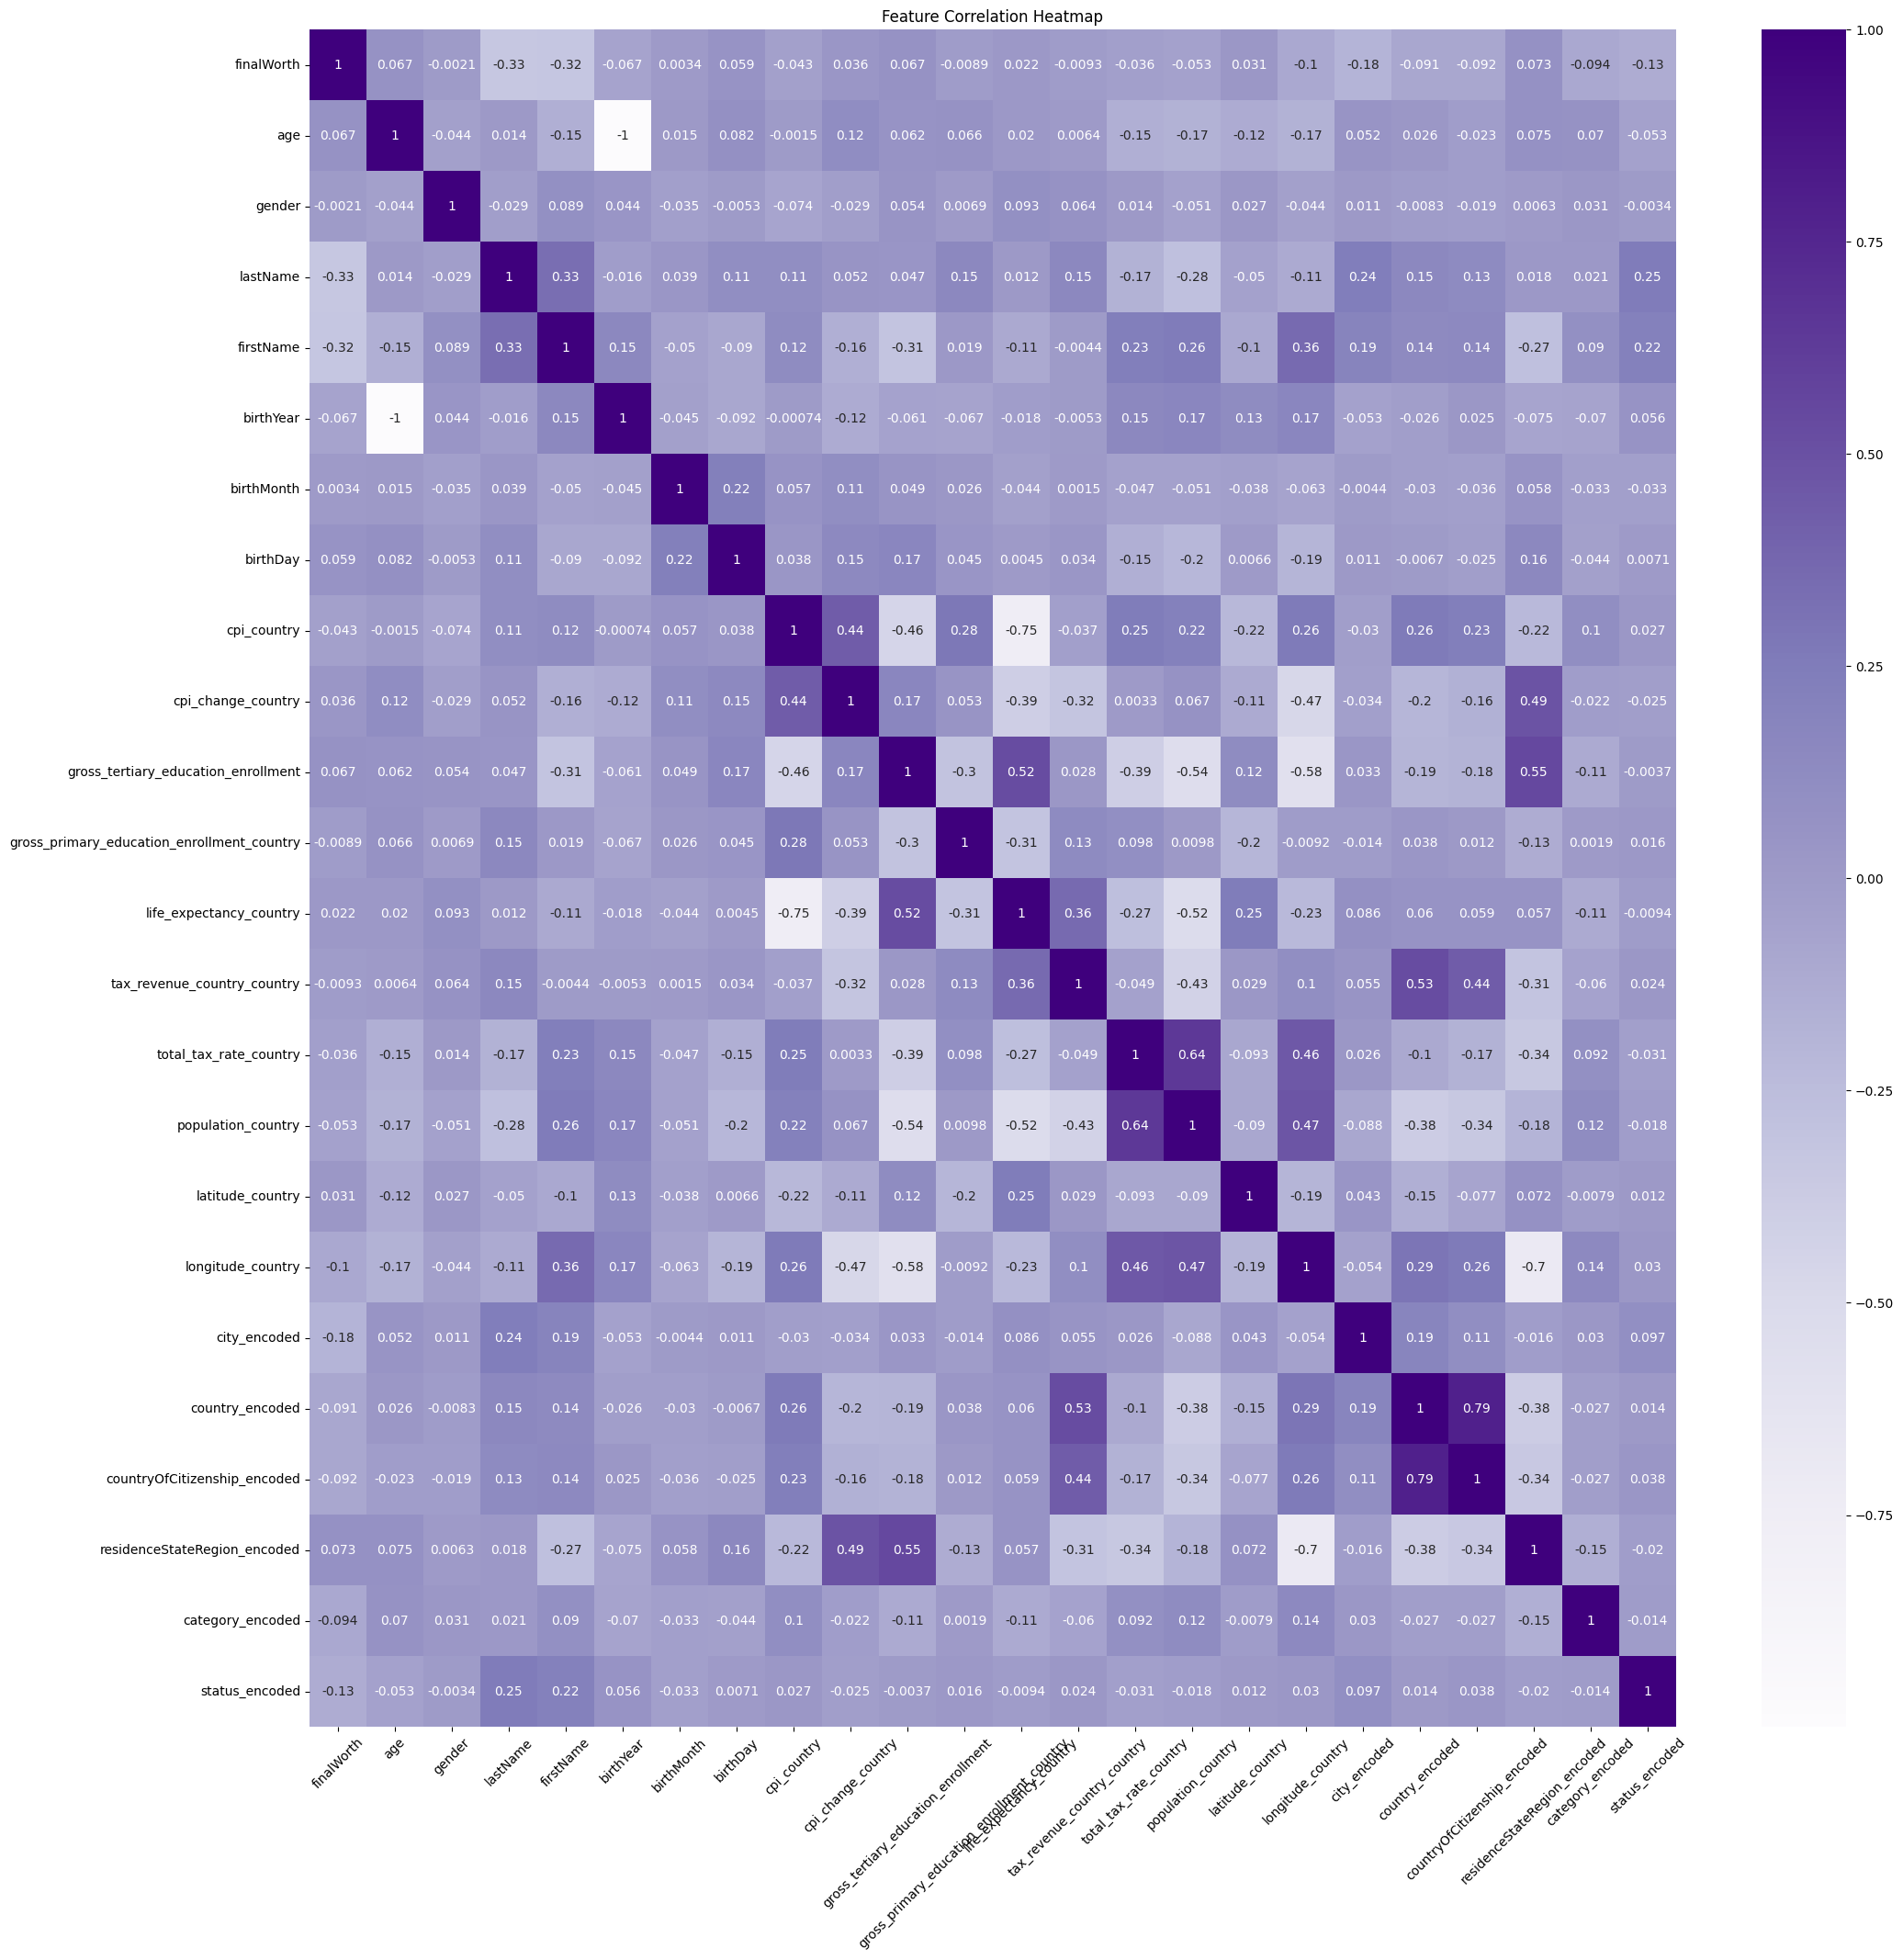

In [ ]:
corr = df.select_dtypes(['int64','float64']).corr()

plt.figure(figsize=(24,24), facecolor='w')
sns.heatmap(corr, annot=True, cmap='Purples')
plt.title('Feature Correlation Heatmap')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

# 3.0 Preprocessing & Training

## 3.1 Imports

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor # Import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import datetime
import pickle
from sklearn import __version__ as sklearn_version

## 3.2 Train Test Split

In [ ]:
df.columns

Index(['finalWorth', 'category', 'personName', 'age', 'country', 'city',
       'source', 'countryOfCitizenship', 'selfMade', 'status', 'gender',
       'birthDate', 'lastName', 'firstName', 'date', 'birthYear', 'birthMonth',
       'birthDay', 'cpi_country', 'cpi_change_country', 'gdp_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'city_encoded', 'country_encoded', 'countryOfCitizenship_encoded',
       'residenceStateRegion_encoded', 'category_encoded', 'status_encoded'],
      dtype='object')

In [ ]:
df.drop(columns=['finalWorth_log'], inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='finalWorth'),
                                                    df.finalWorth, test_size=0.3,
                                                    random_state=47)

In [ ]:
X_train.shape, X_test.shape

((1848, 34), (792, 34))

In [ ]:
names_list = df.select_dtypes('object').columns.to_list()
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((1848, 24), (792, 24))

In [ ]:
y_train.shape, y_test.shape

((1848,), (792,))

## 3.3 Not-Even-A-Model

In [ ]:
train_mean = y_train.mean()
train_mean

np.float64(4427.218614718615)

In [ ]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[4427.21861472]])

In [ ]:
y_pred_dumb = dumb_reg.predict(X_train)
y_pred_dumb[:5]

array([4427.21861472, 4427.21861472, 4427.21861472, 4427.21861472,
       4427.21861472])

In [ ]:
y_tr_pred_ = train_mean * np.ones(len(y_train))

In [ ]:
y_te_pred = train_mean * np.ones(len(y_test))

## 3.4 Metrics

### 3.4.1 R-squared

In [ ]:
r2_score(y_train, y_pred_dumb), r2_score(y_test, y_te_pred)

(0.0, -0.003156831446035513)

### 3.4.2 Mean Absolute Error

In [ ]:
mean_absolute_error(y_train, y_pred_dumb), mean_absolute_error(y_test, y_te_pred)

(3545.676910571391, 4192.590679522498)

### 3.4.3 Mean Squared Error

In [ ]:
mean_squared_error(y_train, y_pred_dumb), mean_squared_error(y_test, y_te_pred)

(79693788.36779203, 136428830.0922412)

## 3.5 Initial Models

### Regression Models

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#Linear Regression
lr_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

# Lasso Regression
lasso_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    SelectKBest(f_regression),
    Lasso()
)

# Ridge Regression
ridge_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    SelectKBest(f_regression),
    Ridge()
)

# Fitting models on Training data
lr_pipe.fit(X_train, y_train)
lasso_pipe.fit(X_train, y_train)
ridge_pipe.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr_pipe.predict(X_test)
y_pred_lasso = lasso_pipe.predict(X_test)
y_pred_ridge = ridge_pipe.predict(X_test)

Text(0.5, 0.98, 'True vs Predicted')

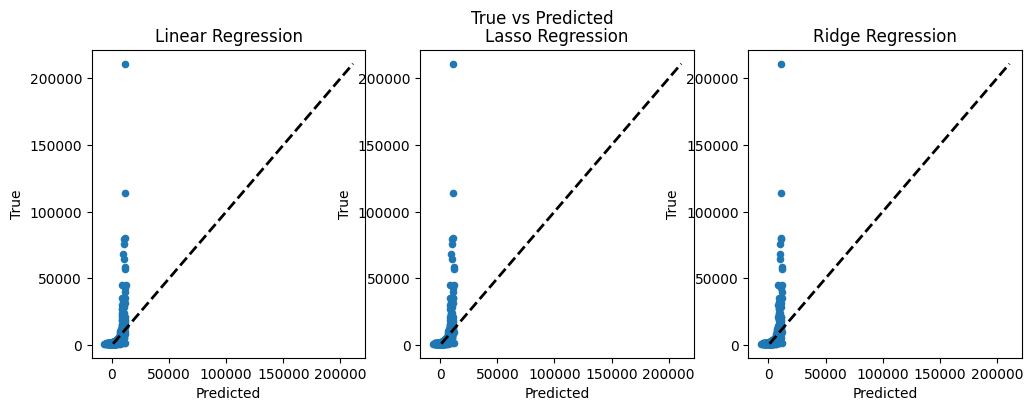

In [ ]:
#Plot the Regression Models

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4), facecolor='w')

#plot linear regression
ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

#plot lasso regression
ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

#plot ridge regression
ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    SelectKBest(f_regression),
    DecisionTreeRegressor()
)

dtr_pipe.fit(X_train, y_train)

y_pred_dtr = dtr_pipe.predict(X_test)

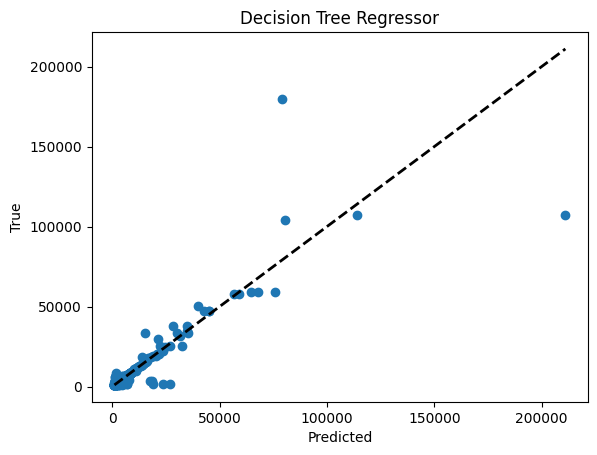

In [ ]:
#plot Decision Tree Regressor
plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr_pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    SelectKBest(f_regression),
    RandomForestRegressor()
)

rfr_pipe.fit(X_train, y_train)

y_pred_rfr = rfr_pipe.predict(X_test)

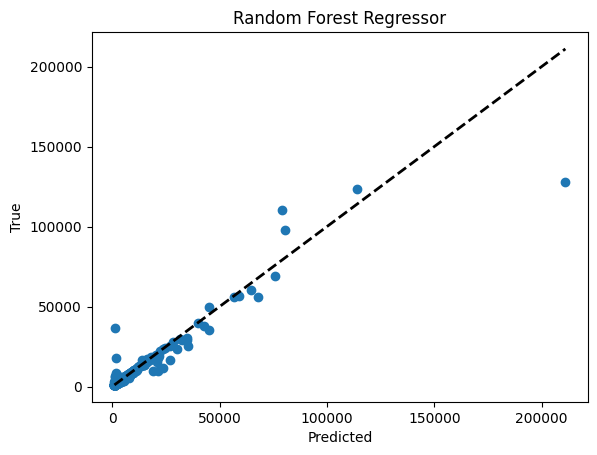

In [ ]:
#plot Random Forest Regressor
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10714.45 		 114799531.10 	3679.74 		0.16
LassoRegression 	 10714.54 		 114801427.34 	3679.84 		0.16
RidgeRegression 	 10714.56 		 114801701.44 	3679.49 		0.16


In [ ]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 5610.41 		 31476691.92 		770.45 		0.77


In [ ]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 3751.88 		 14076606.11 		622.13 		0.90


#### Hyperparamter Tuning

In [ ]:
k = [k+1 for k in range(len(X_train.columns))]
n_est = [int(n) for n in np.logspace(start=1, stop=2, num=6)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median'],
        'selectkbest__k': k
}

In [ ]:
rfr_grid_cv = GridSearchCV(rfr_pipe, param_grid=grid_params, verbose=1, cv=3, n_jobs=-1)

In [ ]:
rfr_grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7d1e0aa8c9a0>)),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 15, 25, 39,
                                                                 63, 100],
                         'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]},
             verbose=1)

In [ ]:
rfr_grid_cv.best_params_

{'randomforestregressor__n_estimators': 15,
 'selectkbest__k': 3,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [ ]:
score_mean = rfr_grid_cv.cv_results_['mean_test_score']
score_std = rfr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in rfr_grid_cv.cv_results_['param_selectkbest__k']]

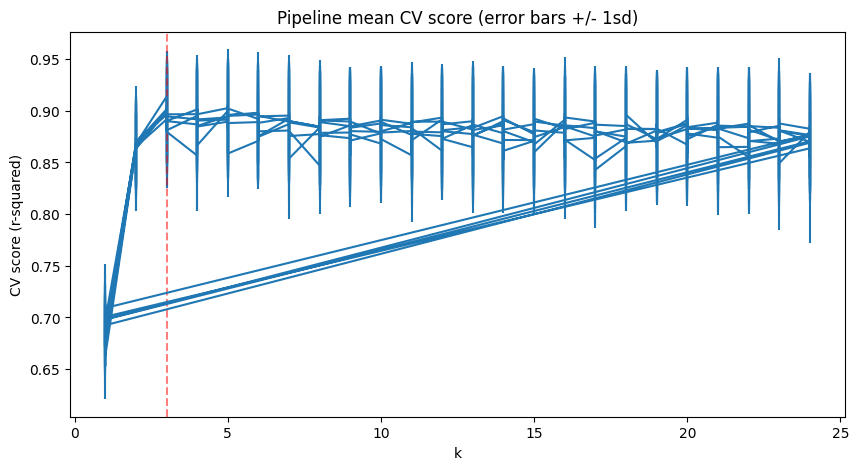

In [ ]:
best_k = rfr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [ ]:
rf_neg_mae = cross_validate(rfr_grid_cv.best_estimator_, X_train, y_train,
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [ ]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(np.float64(514.7740618667448), np.float64(93.36592871974271))

In [ ]:
print("""Grid Cross Validation Regressor \t {:.2f}""".format(
            mean_absolute_error(y_test, rfr_grid_cv.best_estimator_.predict(X_test))))

Grid Cross Validation Regressor 	 614.19


#### Feature Importance

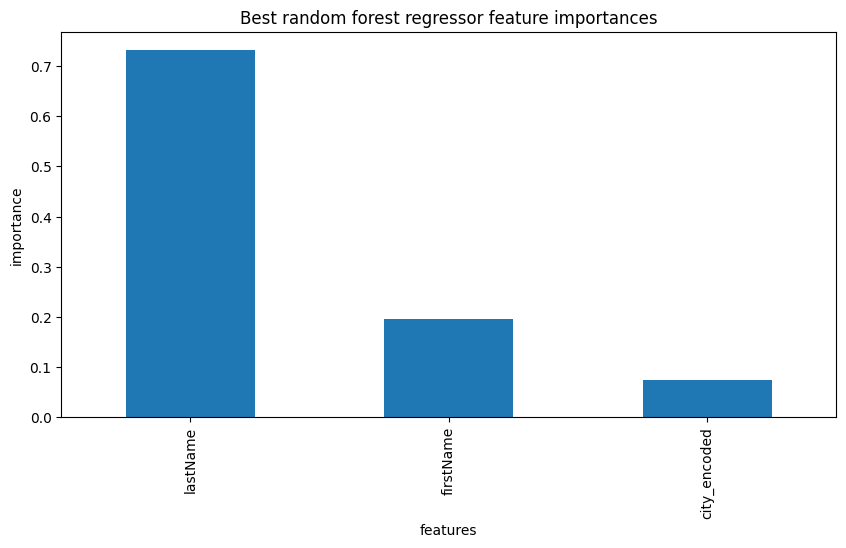

In [ ]:
plt.subplots(figsize=(10, 5))
imps = rfr_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_

# Get the names of the features selected by SelectKBest
selected_features_mask = rfr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
selected_feature_names = X_train.columns[selected_features_mask]

rf_feat_imps = pd.Series(imps, index=selected_feature_names).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

### Classification Models

## Final Model Selection

In [ ]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(rfr_pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
best_model = rfr_grid_cv.best_estimator_
best_model.version = 2.0
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [ ]:
modelpath = '/content/drive/MyDrive/Models'
save_file(best_model, 'cbb_model_2.pkl', modelpath)

# 4.0 Modeling Checkpoint

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/cbb_cleaned.csv')

## Load Model

In [ ]:
expected_model_version = '1.0'
model_path = '/content/drive/MyDrive/Models/cbb_model_2.pkl' # Corrected path
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
else:
    print("Expected model not found")

In [ ]:
model.version

# Turn into PDF

In [ ]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-extra

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Billionaire Data Science for Regression.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Billionaire Data Science for Regression.ipynb to pdf
[NbConvertApp] Support files will be in Billionaire Data Science for Regression_files/
[NbConvertApp] Making directory ./Billionaire Data Science for Regression_files
[NbConvertApp] Writing 191181 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1671983 bytes to /content/drive/MyDrive/Colab Notebooks/Billionaire Data Science for Regression.pdf
